# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
print df_raw.count()
df_raw.shape


admit       400
gre         398
gpa         398
prestige    399
dtype: int64


(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has larger mean, such that has larger STD

#### Question 4. Drop data points with missing data


In [10]:
df_raw = df_raw.dropna()
df_raw.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: use isnull() function

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x11c51b1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x11c51bfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c53a310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c52fc90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11bffe150>,
  <matplotlib.lines.Line2D at 0x11c51b990>]}

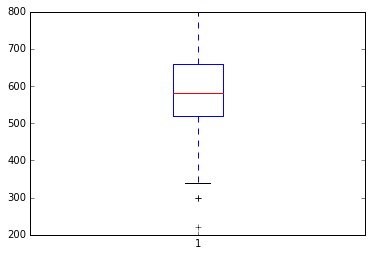

In [14]:
#boxplot 1

plt.boxplot(df_raw.gre)

{'boxes': [<matplotlib.lines.Line2D at 0x11c7640d0>],
 'caps': [<matplotlib.lines.Line2D at 0x11c764ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c77d210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c770b90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11c7bc590>,
  <matplotlib.lines.Line2D at 0x11c764890>]}

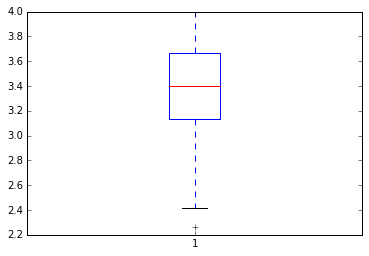

In [15]:
#boxplot 2 
plt.boxplot(df_raw.gpa)

#### Question 7. What do this plots show?

Answer:  shows the median, first quartile, third quartile

#### Question 8. Describe each distribution 

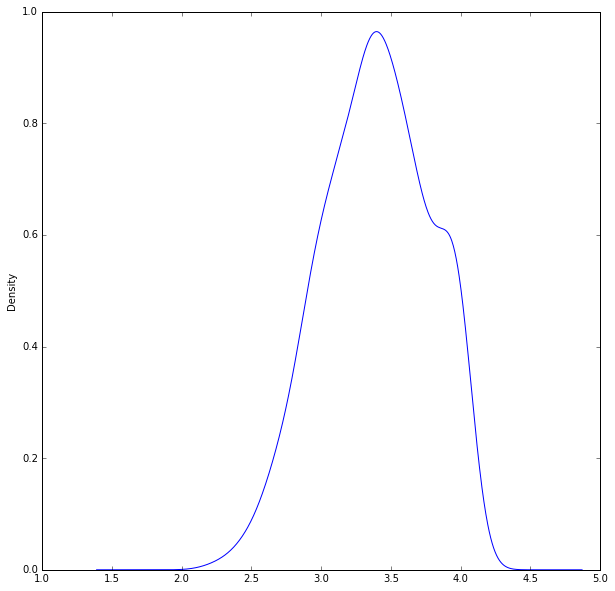

In [19]:
# plot the distribution of each variable 
df_raw.gpa.plot(kind = "density",figsize = (10,10))


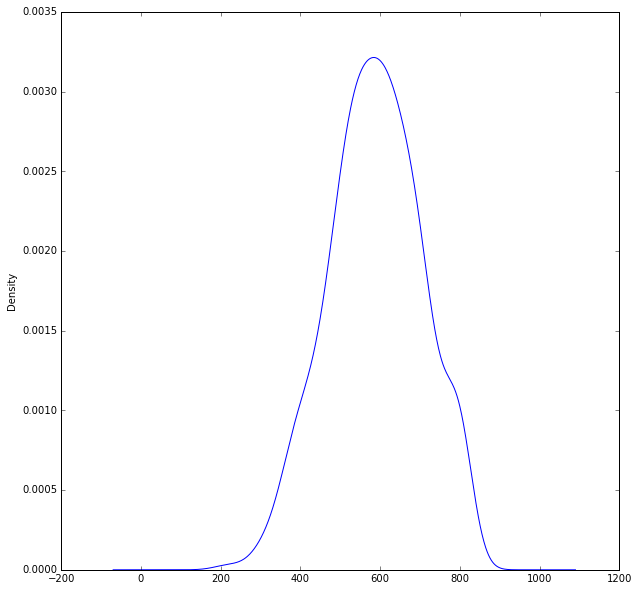

In [20]:
df_raw.gre.plot(kind = "density",figsize = (10,10))

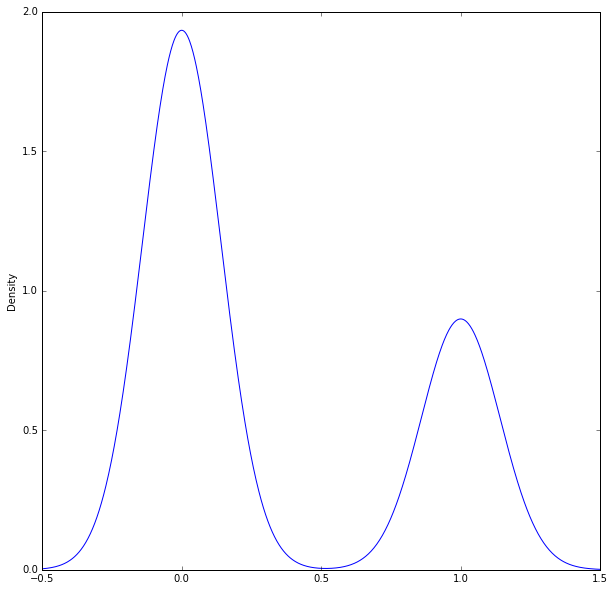

In [21]:
df_raw.admit.plot(kind = "density",figsize = (10,10))

In [24]:
2

2

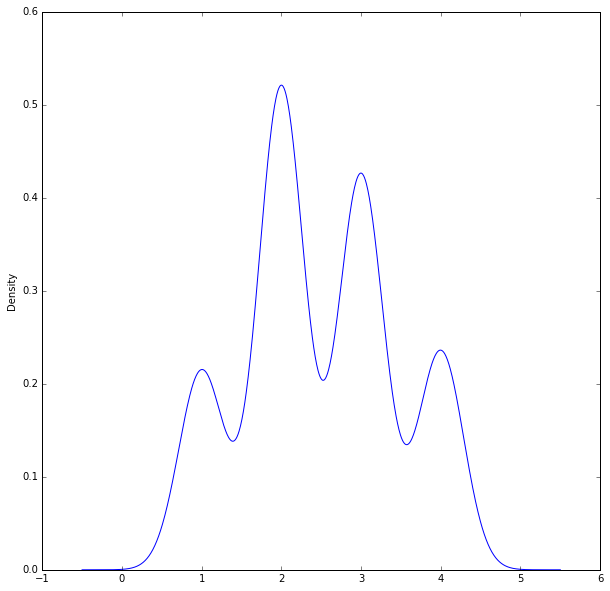

In [22]:
df_raw.prestige.plot(kind = "density",figsize = (10,10))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [ ]:
The gre is close to normal distribution, but others are not

Answer: 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: yes, we can try different forms of transformation, such as log version.

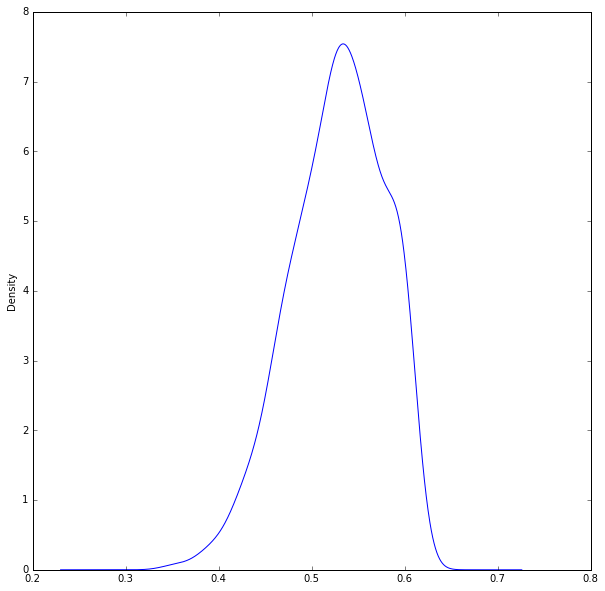

In [27]:
log_columns = ["gpa","prestige"]
log_data = df_raw.copy()
log_data[log_columns] = log_data[log_columns].apply(np.log10)
log_data.gpa.plot(kind = "density",figsize = (10,10))

#### Question 11. Which of our variables are potentially colinear? 

In [28]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: 1) admit is positively correlated with gre and gpa, but negatively correlated with prestige.
        2) gre and gpa are also highly correlated,which may arise the collinearity.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: run the linear regression between admit and prestige

#### Question 14. What is your hypothesis? 

Answer: The bigger number of prestige, the lower the admission rate

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data
we can also impute it with a value, such as zero or median


#### 2. Bonus: Log transform the skewed data, see above
see above

#### 3. Advanced: Impute missing data
df_raw.fillna(0)